# MLP Training Phase

In [20]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

In [16]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[4].split(".")[0])
        print(fn)
    return np.array(features), np.array(labels)


tr_features, tr_labels = parse_audio_files('./train_sounds_3/*.wav')

print(tr_labels)

tr_features = np.array(tr_features, dtype=pd.Series)
tr_labels = np.array(tr_labels, dtype=pd.Series)


X=tr_features.astype(int)
y=tr_labels.astype(str)
clf = MLPClassifier(solver='adam', alpha=1e-6,
                    hidden_layer_sizes=(9, 5), random_state=None, verbose=2)
clf.fit(X,y)

filename = 'clf_Model_protocol_mlp.sav'

pickle.dump(clf, open(filename, 'wb'), protocol=2)

print('Model Saved..')
print('Score:', clf.score(X=tr_features.astype(int), y=tr_labels.astype(str)))

./train_sounds_3\OAF_back_angry.wav
./train_sounds_3\OAF_back_disgust.wav
./train_sounds_3\OAF_back_fear.wav
./train_sounds_3\OAF_back_happy.wav
./train_sounds_3\OAF_back_neutral.wav
./train_sounds_3\OAF_back_ps.wav
./train_sounds_3\OAF_back_sad.wav
./train_sounds_3\OAF_bar_angry.wav
./train_sounds_3\OAF_bar_disgust.wav
./train_sounds_3\OAF_bar_fear.wav
./train_sounds_3\OAF_bar_happy.wav
./train_sounds_3\OAF_bar_neutral.wav
./train_sounds_3\OAF_bar_ps.wav
./train_sounds_3\OAF_bar_sad.wav
./train_sounds_3\OAF_base_angry.wav
./train_sounds_3\OAF_base_disgust.wav
./train_sounds_3\OAF_base_fear.wav
./train_sounds_3\OAF_base_happy.wav
./train_sounds_3\OAF_base_neutral.wav
./train_sounds_3\OAF_base_ps.wav
./train_sounds_3\OAF_base_sad.wav
./train_sounds_3\OAF_bath_angry.wav
./train_sounds_3\OAF_bath_disgust.wav
./train_sounds_3\OAF_bath_fear.wav
./train_sounds_3\OAF_bath_happy.wav
./train_sounds_3\OAF_bath_neutral.wav
./train_sounds_3\OAF_bath_ps.wav
./train_sounds_3\OA_bite_neutral.wav
['an

C:\Users\Dell\AppData\Roaming\Python\Python35\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [28]:
def plot_learning_curve(estimator, X, Y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    X=tr_features.astype(int)
    y=tr_labels.astype(str)
    estimator = MLPClassifier(solver='adam', alpha=1e-6,
                    hidden_layer_sizes=(9, 5), random_state=None, verbose=2)
  
    
    

In [37]:
X=tr_features.astype(int)
y=tr_labels.astype(str)
estimator = MLPClassifier(solver='adam', alpha=1e-6,
                    hidden_layer_sizes=(9, 5), random_state=None, verbose=2)
plot_learning_curve(estimator, X, y, (0.7, 1.01), n_jobs=4)

In [38]:
plt.show()

In [17]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
# Method to extract features from speech using librosa


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


# List to store file names
target_files = []

# Method to extract label name and extract features from audio file


def parse_audio_files(path):
    labels = []
    features = np.empty((0, 193))
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[4].split(".")[0])
        target_files.append(fn)
    return np.array(features), np.array(labels)


# Get labels and features of audion file of specified path
ts_features, ts_labels = parse_audio_files('./test_sounds_3/*.wav')

# Convert features and labels to the pandas Series data type
ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Trained Model file name
filename = 'clf_Model_protocol_mlp.sav'

# Load saved model from file
model = pickle.load(open(filename, 'rb'))

# Predict the emotion class
prediction = model.predict(ts_features)

# True labels
test_true = ts_labels

# List to store prediction
test_predicted = []

# Iterate over model prediction and store it into list
for i, val in enumerate(prediction):
    test_predicted.append(val)


# Accuracy score of model
print('Accuracy Score of MLP model is:', accuracy_score(test_true, test_predicted))

# Number of corrected prediction
print('Number of correct prediction by using MLP is:', accuracy_score(test_true, test_predicted, normalize=False), 'out of', len(ts_labels))

Accuracy Score of MLP model is: 0.833333333333
Number of correct prediction by using MLP is: 5 out of 6


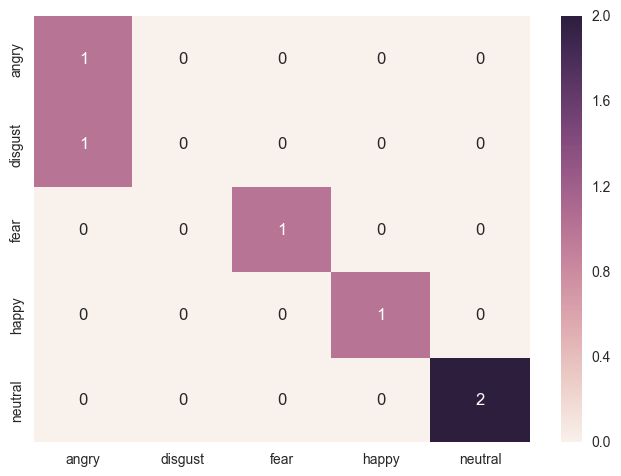

In [19]:
# Plotting confusion matrix
matrix = confusion_matrix(test_true, test_predicted)
classes = list(set(ts_labels))
classes.sort()
df = pd.DataFrame(matrix, columns=classes, index=classes)
plt.figure()
sn.heatmap(df, annot=True)

plt.show()